In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
bm_train = pd.read_csv("train_v9rqX0R.csv")
bm_test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
bm_train.head(25)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
bm_train.shape

(8523, 12)

In [5]:
bm_test.shape

(5681, 11)

In [6]:
bm_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bm_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,5681,1543,DRF48,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,4705.0,NaN,NaN,NaN,12.695633,4.664849,4.555,8.645,12.5,16.7,21.35
Item_Fat_Content,5681,5,Low Fat,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,5681.0,NaN,NaN,NaN,0.065684,0.051252,0.0,0.027047,0.054154,0.093463,0.323637
Item_Type,5681,16,Snack Foods,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,5681.0,NaN,NaN,NaN,141.023273,61.809091,31.99,94.412,141.4154,186.0266,266.5884
Outlet_Identifier,5681,10,OUT027,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,5681.0,NaN,NaN,NaN,1997.828903,8.372256,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,4075,3,Medium,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,5681,3,Tier 3,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
bm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
bm_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
bm_train["Item_Weight"].fillna(bm_train["Item_Weight"].mode()[0],inplace=True)
bm_train["Outlet_Size"].fillna(bm_train["Outlet_Size"].mode()[0],inplace=True)


In [11]:
bm_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.150,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


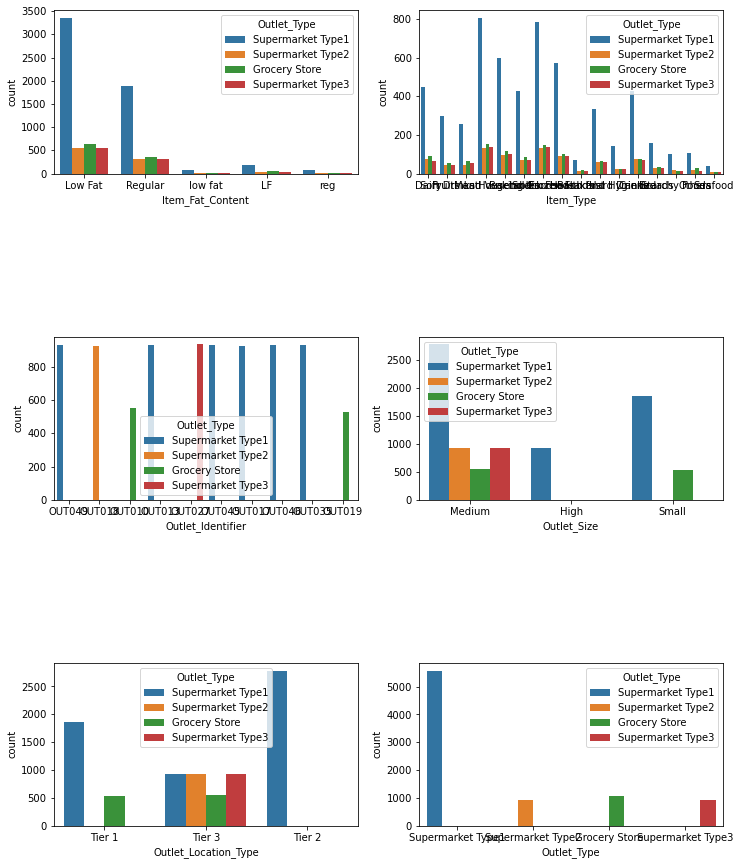

In [12]:
bm_train1 = bm_train.drop(columns=['Item_Identifier']) ## Dropping Loan ID
categorical_columns = ['Item_Fat_Content', 'Item_Type',  'Outlet_Identifier','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=bm_train1,hue='Outlet_Type',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

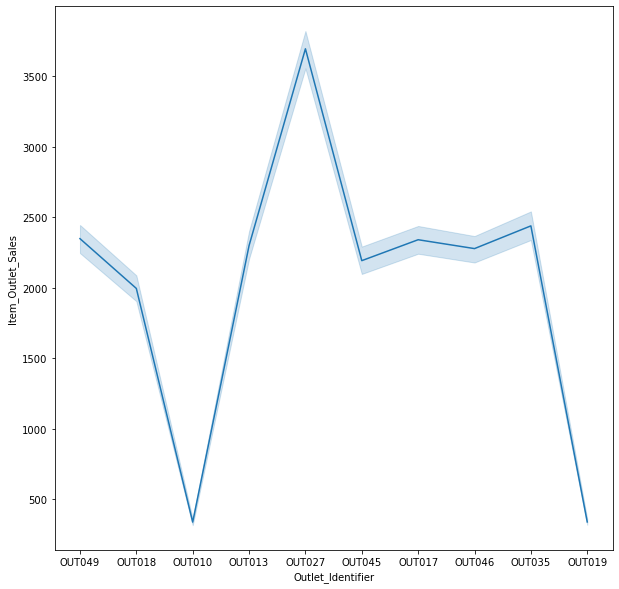

In [13]:
plt.figure(figsize=(10,10))
sns.lineplot(x=bm_train['Outlet_Identifier'], y=bm_train['Item_Outlet_Sales'])

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

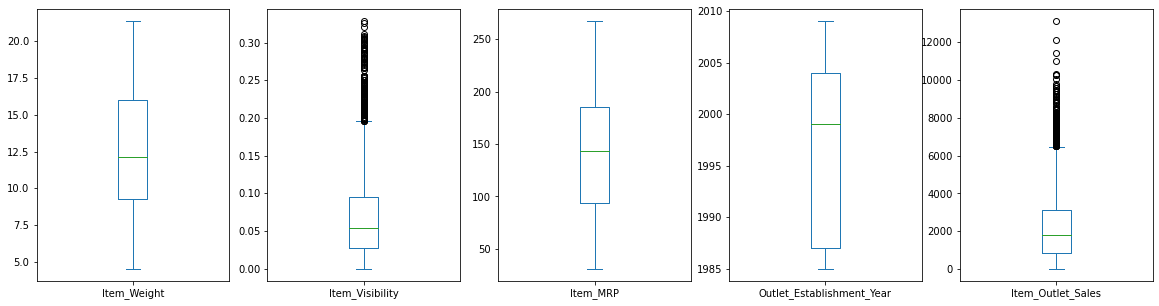

In [14]:
bm_train.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In [15]:
bm_train1=bm_train.iloc[:,1:]
for c in bm_train1.columns:
    print(bm_train[c].value_counts())

12.150    1549
17.600      82
13.650      77
11.800      76
9.300       68
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 1

In [16]:
#categorical_columns = ['Item_Fat_Content', 'Item_Type',  'Outlet_Identifier','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
for c in categorical_columns:
    print(bm_train[c].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [17]:
bm_train['Item_Fat_Content']=bm_train['Item_Fat_Content'].replace('LF', 'Low Fat')
bm_train['Item_Fat_Content']=bm_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
bm_train['Item_Fat_Content']=bm_train['Item_Fat_Content'].replace('reg', 'Regular')

In [19]:
bm_train['Item_Fat_Content'] = bm_train['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 2})

bm_train['Item_Type'] = bm_train['Item_Type'].map({'Dairy':1, 'Soft Drinks':2, 'Meat':3, 'Fruits and Vegetables':4, 'Household':5,
                                                   'Baking Goods':6, 'Snack Foods':7, 'Frozen Foods':8, 'Breakfast':9,'Health and Hygiene':10, 
                                                   'Hard Drinks':11,'Canned':12, 'Breads':13, 'Starchy Foods':14,'Others':15, 'Seafood':16})


bm_train['Outlet_Identifier'] = bm_train['Outlet_Identifier'].map({'OUT010':1,'OUT013':2,'OUT017':3,'OUT018':4,'OUT019':5,
                                                                     'OUT027':6,'OUT035':7,'OUT045':8,'OUT046':9,'OUT049':10})

bm_train['Outlet_Size'] = bm_train['Outlet_Size'].map({'Small':1,'Medium':2, 'High':3 })

bm_train['Outlet_Location_Type'] = bm_train['Outlet_Location_Type'].map({'Tier 1': 1, 'Tier 2': 2,'Tier 3': 3})

bm_train['Outlet_Type'] = bm_train['Outlet_Type'].map({'Supermarket Type1': 1, 'Supermarket Type2': 2,'Supermarket Type3': 3,'Grocery Store': 4})


In [20]:
bm_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,1,249.8092,10,1999,2,1,1,3735.1380
1,DRC01,5.92,2,0.019278,2,48.2692,4,2009,2,3,2,443.4228
2,FDN15,17.50,1,0.016760,3,141.6180,10,1999,2,1,1,2097.2700
3,FDX07,19.20,2,0.000000,4,182.0950,1,1998,2,3,4,732.3800
4,NCD19,8.93,1,0.000000,5,53.8614,2,1987,3,3,1,994.7052


In [21]:
x= bm_train.drop(columns=['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'])

In [22]:
y=bm_train.Item_Outlet_Sales

In [23]:
#*******************LinearRegression for train.csv data******************#

In [24]:
model = LinearRegression()

In [25]:
model.fit(x,y)

LinearRegression()

In [26]:
y_pred = model.predict(x)

In [27]:
y_pred

array([3561.00676263,  640.23027413, 1848.21042842, ..., 1874.43010038,
       1241.54338009, 1382.87071279])

In [28]:
mean_squared_error (y, y_pred)

1645382.8094114119

In [29]:
mean_squared_error (y, y_pred,squared=False)

1282.7247598029016

In [30]:
mean_absolute_error(y, y_pred)

950.486091607715

In [31]:
r2_score(y,y_pred)

0.4349257405843383

In [32]:
model.coef_

array([   -5.10391407,    67.02036416, -2048.18342616,     3.20093853,
          15.49004193,   -48.38054566,  -509.59256851,   613.7656969 ,
        -623.49440156])

In [33]:
model.intercept_

97443.18931870747

In [34]:
#*************************using test.csv data file*******************#

In [35]:
bm_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [36]:
bm_test["Item_Weight"].fillna(bm_test["Item_Weight"].mode()[0],inplace=True)
bm_test["Outlet_Size"].fillna(bm_test["Outlet_Size"].mode()[0],inplace=True)

In [37]:
bm_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,10.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [38]:
categorical_columns_test = ['Item_Fat_Content', 'Item_Type',  'Outlet_Identifier','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']
for c in categorical_columns_test:
    print(bm_test[c].unique())


['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [39]:
bm_test['Item_Fat_Content']=bm_test['Item_Fat_Content'].replace('LF', 'Low Fat')
bm_test['Item_Fat_Content']=bm_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
bm_test['Item_Fat_Content']=bm_test['Item_Fat_Content'].replace('reg', 'Regular')

In [42]:
bm_test['Item_Fat_Content'] = bm_test['Item_Fat_Content'].map({'Low Fat': 1, 'Regular': 2})

bm_test['Item_Type'] = bm_test['Item_Type'].map({'Dairy':1, 'Soft Drinks':2, 'Meat':3, 'Fruits and Vegetables':4, 'Household':5,
                                                   'Baking Goods':6, 'Snack Foods':7, 'Frozen Foods':8, 'Breakfast':9,'Health and Hygiene':10, 
                                                   'Hard Drinks':11,'Canned':12, 'Breads':13, 'Starchy Foods':14,'Others':15, 'Seafood':16})


bm_test['Outlet_Identifier'] = bm_test['Outlet_Identifier'].map({'OUT010':1,'OUT013':2,'OUT017':3,'OUT018':4,'OUT019':5,
                                                                     'OUT027':6,'OUT035':7,'OUT045':8,'OUT046':9,'OUT049':10})

bm_test['Outlet_Size'] = bm_test['Outlet_Size'].map({'Small':1,'Medium':2, 'High':3 })

bm_test['Outlet_Location_Type'] = bm_test['Outlet_Location_Type'].map({'Tier 1': 1, 'Tier 2': 2,'Tier 3': 3})

bm_test['Outlet_Type'] = bm_test['Outlet_Type'].map({'Supermarket Type1': 1, 'Supermarket Type2': 2,'Supermarket Type3': 3,'Grocery Store': 4})


In [43]:
X_train = x
Y_train =y
X_test= bm_test.drop(columns=['Item_Identifier','Outlet_Identifier'])

In [44]:
X_train.shape

(8523, 9)

In [45]:
test_model = LinearRegression()

In [46]:
test_model.fit(x,y)

LinearRegression()

In [47]:
test_y_pred = model.predict(X_test)

In [48]:
test_y_pred

array([1340.38124069, 1297.04563871, 2688.33954826, ..., 1906.92892236,
       3347.14881248, 1315.71087001])

In [49]:
df = pd.DataFrame(data =test_y_pred )

In [50]:
df

,0
0,1340.381241
1,1297.045639
2,2688.339548
3,2350.342738
4,3828.404865
...,...
5676,2572.112788
5677,2289.048812
5678,1906.928922
5679,3347.148812


In [51]:
final = pd.DataFrame(data=bm_test ,columns =("Item_Identifier","Outlet_Identifier"))

In [52]:
final['Item_Outlet_Sales'] = df

In [53]:
final

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,10,1340.381241
1,FDW14,3,1297.045639
2,NCN55,1,2688.339548
3,FDQ58,3,2350.342738
4,FDY38,6,3828.404865
...,...,...,...
5676,FDB58,9,2572.112788
5677,FDD47,4,2289.048812
5678,NCO17,8,1906.928922
5679,FDJ26,3,3347.148812
